In [1]:
# importig pandas,numpy,seaborn,matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset for training and testing
df_train=pd.read_csv("archive/KDDTrain+.txt",header=None)
df_test=pd.read_csv("archive/KDDTest+.txt",header=None)

In [3]:
# assing column values to each column
columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
    'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
    'root_shell','su_attempted','num_root','num_file_creations','num_shells',
    'num_access_files','num_outbound_cmds','is_host_login','is_guest_login',
    'count','srv_count','serror_rate','srv_serror_rate','rerror_rate',
    'srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
    'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
    'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate',
    'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate',
    'label','difficulty_level'
]
df_train.columns=columns
df_test.columns=columns

In [4]:
# viewing 10 sample of each dataset (both training and testing)
display(df_train.sample(10))
df_test.sample(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
38778,0,udp,private,SF,105,0,0,0,0,0,...,0.83,0.06,0.06,0.00,0.0,0.0,0.0,0.0,normal,19
116908,0,tcp,netbios_ssn,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.0,1.0,0.0,0.0,neptune,19
122090,0,tcp,name,S0,0,0,0,0,0,0,...,0.02,0.05,0.00,0.00,1.0,1.0,0.0,0.0,neptune,19
75086,0,tcp,nntp,S0,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,1.0,1.0,0.0,0.0,neptune,21
117458,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.13,0.0,0.0,0.0,0.0,warezclient,11
69632,0,udp,other,SF,147,147,0,0,0,0,...,0.00,0.62,0.99,0.00,0.0,0.0,0.0,0.0,normal,21
84581,0,tcp,http,SF,203,863,0,0,0,0,...,1.00,0.00,0.05,0.02,0.0,0.0,0.0,0.0,normal,21
115251,0,tcp,http,SF,366,573,0,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,normal,21
112534,0,udp,domain_u,SF,45,70,0,0,0,0,...,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal,18
38968,0,tcp,http,REJ,0,0,0,0,0,0,...,1.00,0.00,0.01,0.06,0.0,0.0,1.0,1.0,normal,21


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
8053,0,tcp,http,SF,332,274,0,0,0,0,...,1.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,normal,21
17192,0,tcp,private,S0,0,0,0,0,0,0,...,0.01,0.08,0.00,0.0,1.0,1.0,0.00,0.0,neptune,21
20818,0,udp,private,SF,55,52,0,0,0,0,...,1.00,0.00,0.85,0.0,0.0,0.0,0.00,0.0,normal,16
3965,0,tcp,http,SF,243,310,0,0,0,0,...,1.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,normal,21
10060,4,tcp,pop_3,SF,26,93,0,0,0,0,...,0.98,0.01,0.00,0.0,0.0,0.0,0.00,0.0,guess_passwd,18
11742,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.83,0.01,0.00,0.0,0.0,0.0,0.07,0.0,normal,18
14242,11,tcp,X11,SF,6,0,0,0,0,0,...,0.04,0.44,0.04,0.0,0.0,0.0,0.12,0.0,saint,4
7732,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.06,0.00,0.0,0.0,0.0,1.00,1.0,neptune,21
8189,4,tcp,pop_3,SF,31,93,0,0,0,0,...,0.93,0.01,0.00,0.0,0.0,0.0,0.04,0.0,guess_passwd,16
16641,0,udp,private,SF,55,54,0,0,0,0,...,1.00,0.00,0.83,0.0,0.0,0.0,0.00,0.0,normal,17


In [5]:
# size of both dataset
print(df_train.shape)
print(df_test.shape)
# test size is 15% and training data size is 75% here

(125973, 43)
(22544, 43)


In [6]:
# checking if there is any missing value or not
print(df_train.isna().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<Axes: >

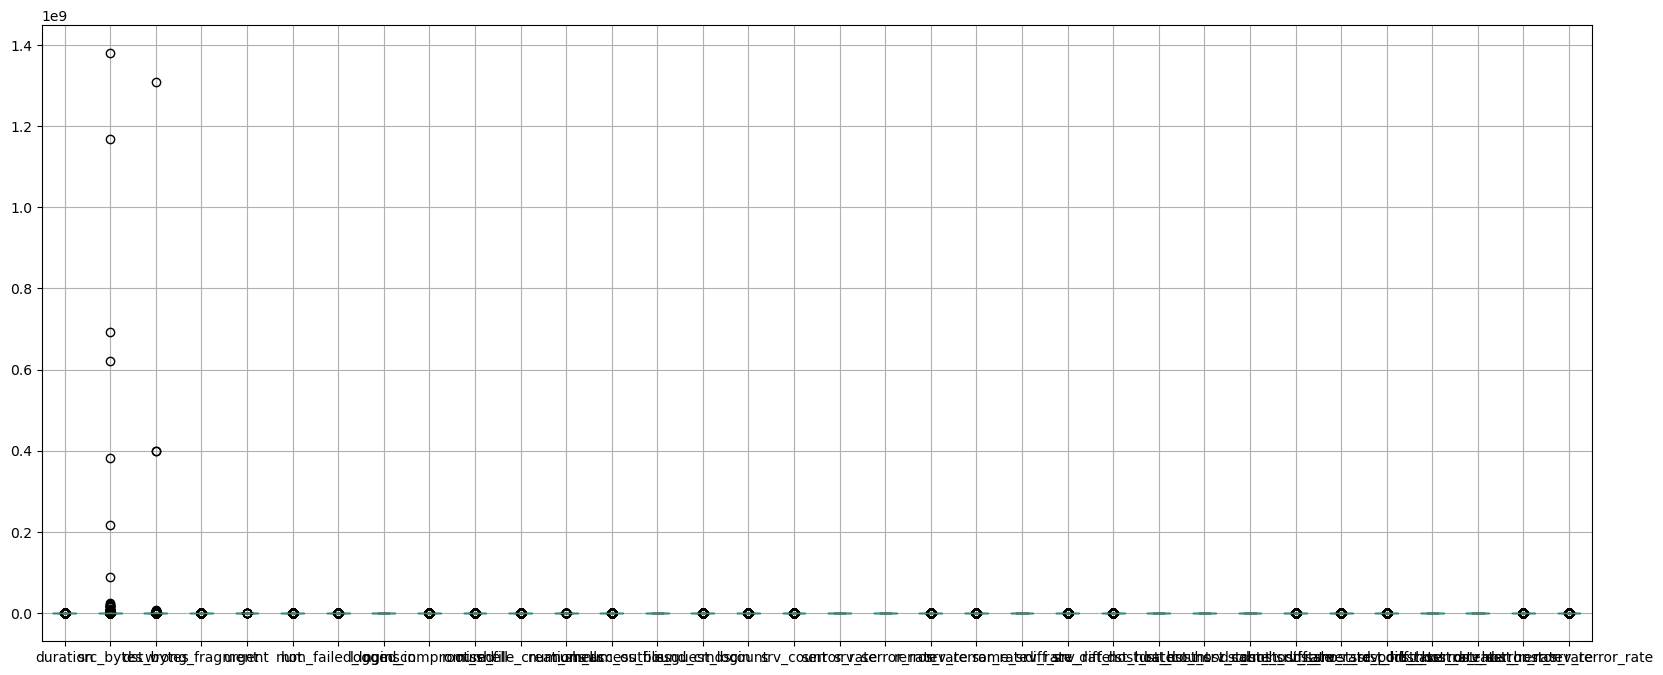

In [7]:
# as there is no missing value so need to do any kind of imputation
# now time for detect if there is any outliers , but outlier removal may cause information loss in intrusion detection.
numeric_cols = [
    'duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins',
    'logged_in','num_compromised','root_shell','num_file_creations','num_shells',
    'num_access_files','num_outbound_cmds','is_guest_login','count','srv_count',
    'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate',
    'diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate'
]
# visualize it using boxplot

df_train[numeric_cols].boxplot(figsize=(20,8))

In [8]:
# detect using z score method
df_scaled=pd.DataFrame()
outlier_summary={}
for col in numeric_cols:
    df_scaled[col]=(df_train[col]-np.mean(df_train[col]))/np.std(df_train[col])
    outliers=(np.abs(df_scaled[col])>3).sum() # detect the no of outliers for each col
    outlier_summary[col]=outliers # assign the no of outliers to its corresponding col

outlier_df=pd.DataFrame.from_dict(outlier_summary,orient='index',columns=['outlier_count'])
outlier_df=outlier_df.sort_values(by='outlier_count',ascending=False)
outlier_df

,outlier_count
srv_diff_host_rate,8144
dst_host_diff_srv_rate,5314
diff_srv_rate,4237
dst_host_srv_diff_host_rate,3691
srv_count,3259
count,2661
duration,1431
is_guest_login,1187
wrong_fragment,1090
hot,822


In [9]:
# as nsl-kdd represents the actual pattern of attacks , so  a large no of extreme values are detected.
# we have to keep them all as eliminating them means we lost many meaningful pattern of the attacks

In [10]:
# now time for encoding of categorical value so that we can apply logic to it
# we have only 3 features with categorical variable (protocol,flag and service)
df_train=pd.get_dummies(df_train,columns=['protocol_type','service','flag'])
df_test=pd.get_dummies(df_test,columns=['protocol_type','service','flag'])
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)

In [11]:
# after encoding sample of df_train and df_test
display(df_train.sample(10))
df_test.sample(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
47453,0,294,4201,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
83287,0,105,147,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
107580,0,222,1718,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
66579,21,222,767,0,0,0,4,0,1,0,...,False,False,False,False,False,False,False,False,True,False
51322,0,348,2029,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
84303,0,339,381,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
5614,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
90661,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
123919,0,308,2698,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
3540,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
20542,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
22074,282,156,597,0,0,0,2,0,1,0,...,False,False,False,False,False,False,False,False,True,False
5674,0,255,1738,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
13012,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
22370,0,0,44,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
10508,0,309,950,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
6177,0,105,105,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
12614,0,43,43,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4730,0,300,1543,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
20237,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False


In [12]:
# shape of training dataset
df_train.shape  
 # so now we have 124 of attributes after encoding . 

(125973, 124)

In [13]:
# analyze out target variable (label)
print(df_train['label'].value_counts())
# we have 23 type of labels and except normal every labels is represents an attack 
# so we can binary encoded it. 0 for normal and 1 for attacks(anything else rather than normal)
df_train['label'] = df_train['label'].str.replace('.', '', regex=False).str.strip().str.lower()
df_train['label'] = df_train['label'].apply(lambda x: 0 if x == 'normal' else 1)
print(df_train['label'].sample(10))
# after encoding value counts
df_train['label'].value_counts()

label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64
30491     0
55923     0
48079     1
19059     1
36382     0
21497     1
65412     0
102797    1
107415    1
53444     0
Name: label, dtype: int64


label
0    67343
1    58630
Name: count, dtype: int64

In [14]:
# binary encoder for testing data
df_test['label'] = df_test['label'].str.replace('.', '', regex=False).str.strip().str.lower()
df_test['label'] = df_test['label'].apply(lambda x: 0 if x == 'normal' else 1)

In [15]:
# splitting target and feature variable
X_train=df_train.drop(['label'],axis=1)
y_train=df_train['label']
X_test=df_test.drop(['label'],axis=1)
y_test=df_test['label']

In [16]:
# standardization of numeric variable as it is imp for svm , knn and logistic regression  (distance imp)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [17]:
#model training 
#1 . logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 80.66%
Confusion Matrix:
 [[8897  814]
 [3546 9287]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.92      0.80      9711
           1       0.92      0.72      0.81     12833

    accuracy                           0.81     22544
   macro avg       0.82      0.82      0.81     22544
weighted avg       0.83      0.81      0.81     22544



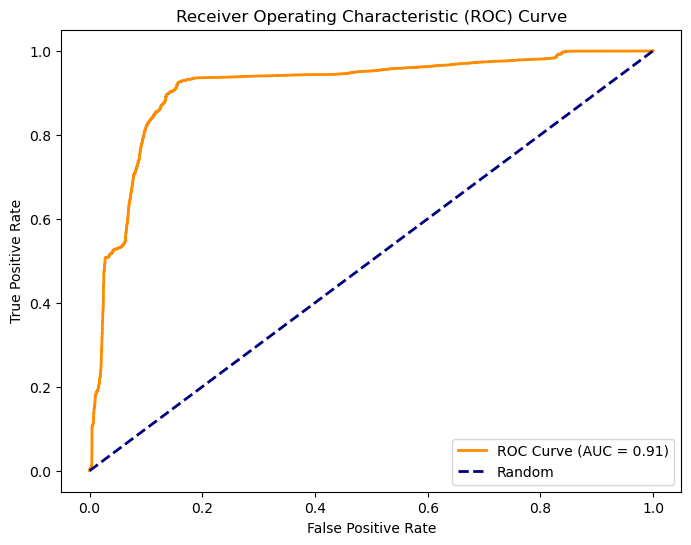

In [19]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [22]:
# 2. random forest 
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    criterion='entropy',
    n_jobs=-1,
    random_state=42
)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 76.86%
Confusion Matrix:
 [[8901  810]
 [4406 8427]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.92      0.77      9711
           1       0.91      0.66      0.76     12833

    accuracy                           0.77     22544
   macro avg       0.79      0.79      0.77     22544
weighted avg       0.81      0.77      0.77     22544



In [23]:
# 3. svm classifier
from sklearn.svm import SVC
sv=SVC(
    C=10,
    kernel='rbf',
    gamma='scale',
    class_weight='balanced',
    probability=False,
    random_state=42
)
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 80.91%
Confusion Matrix:
 [[9085  626]
 [3678 9155]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.94      0.81      9711
           1       0.94      0.71      0.81     12833

    accuracy                           0.81     22544
   macro avg       0.82      0.82      0.81     22544
weighted avg       0.84      0.81      0.81     22544



In [24]:
# 4. KNN 
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(
    n_neighbors=7,
    weights='distance',
    metric='minkowski',
    p=2,
    n_jobs=-1
)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 78.97%
Confusion Matrix:
 [[9032  679]
 [4063 8770]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.93      0.79      9711
           1       0.93      0.68      0.79     12833

    accuracy                           0.79     22544
   macro avg       0.81      0.81      0.79     22544
weighted avg       0.83      0.79      0.79     22544



In [25]:
# 5. Decision tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 82.23%
Confusion Matrix:
 [[ 7258  2453]
 [ 1552 11281]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78      9711
           1       0.82      0.88      0.85     12833

    accuracy                           0.82     22544
   macro avg       0.82      0.81      0.82     22544
weighted avg       0.82      0.82      0.82     22544



In [26]:
# 6. naive bayse
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB(var_smoothing=1e-9)
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 56.94%
Confusion Matrix:
 [[   14  9697]
 [   11 12822]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.00      0.00      9711
           1       0.57      1.00      0.73     12833

    accuracy                           0.57     22544
   macro avg       0.56      0.50      0.36     22544
weighted avg       0.57      0.57      0.41     22544

